书籍信息 《scikit-learn 机器学习》

https://www.epubit.com/bookDetails?id=N15172

代码来源 书籍第二章实例及相关代码内容

[[ 6]
 [ 8]
 [10]
 [14]
 [18]]


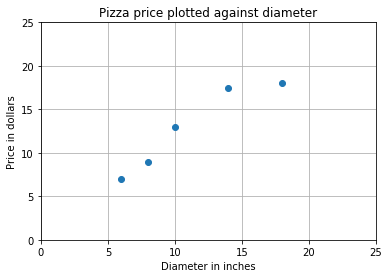

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# X表示我们训练数据的特征，即批萨的直径。
# scikit学习惯例是将特征向量矩阵命名为X。
#大写字母表示矩阵，小写字母表示向量。
X = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
print(X)
# y是表示披萨价格的向量.
y = [7, 9, 13, 17.5, 18]

plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'o')
plt.axis([0, 25, 0, 25])     # x轴、y轴区间值
plt.grid(True)               # 生成网格线
plt.show()

## 价格分布图

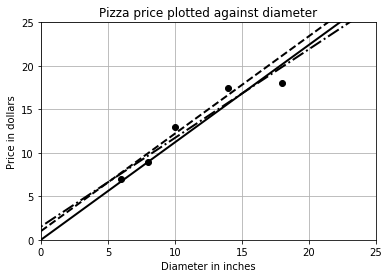

In [6]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'ko')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.plot([0, 25], [0, 28], color='k', linestyle='-', linewidth=2)  # 添加直线
plt.plot([0, 25], [1, 29], color='k', linestyle='--', linewidth=2)
plt.plot([-1, 25], [0.5, 27], color='k', linestyle='-.', linewidth=2)
plt.show()

## 简单数据预测

In [10]:
from sklearn.linear_model import LinearRegression

# 创建一个估计器的实例，线性回归
model = LinearRegression()
# 在训练数据上拟合模型
model.fit(X, y)
# 预测一个从未见过的直径披萨的价格
test_pizza = np.array([[12]]) # 注意这里的括号
print(test_pizza)

predicted_price = model.predict(test_pizza) # 这里的predict必须接受 多维矩阵的参数

print('pizza should cost: $%.2f'  % predicted_price)

[[12]]
pizza should cost: $13.68


In [12]:
# 计算残差平方和 - RSS

print('Residual sum of squares: %.2f' % np.mean((model.predict(X) - y) ** 2))

Residual sum of squares: 1.75


In [13]:
# 计算OLS

# X = np.array([[6], [8], [10], [14], [18]]).reshape(-1, 1)
x_bar = X.mean() # 求取均值 
print(x_bar)

# 注意，在计算样本方差时，我们从训练实例的数量中减去1。
# 这个技术叫做贝塞尔校正。它修正了总体方差估计中的偏差
# 从一个示例。

# X-矩阵数据的减去平均值的平方，求和然后除以 X 数据的行数减 1（贝塞尔校正） 
variance = ((X - x_bar)**2).sum() / (X.shape[0] - 1)
print(variance)

11.2
23.2


In [14]:
# 内置方法
# np.var-均方差，均方差的意义就是将方差进行了平均化
print(np.var(X, ddof=1))

23.2


In [15]:
# 这里我们切换到NumPy ndarray，它提供了一种计算样本平均值的方法。
y = np.array([7, 9, 13, 17.5, 18])

y_bar = y.mean()
# 我们转置X因为两个操作数都必须是行向量
covariance = np.multiply((X - x_bar).transpose(), y - y_bar).sum() / (X.shape[0] - 1)
print(covariance)
print(np.cov(X.transpose(), y)[0][1])

22.65
22.650000000000002


In [16]:
# 计算R方值

import numpy as np
from sklearn.linear_model import LinearRegression

X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = [7, 9, 13, 17.5, 18]

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = [11, 8.5, 15, 18, 11]

model = LinearRegression()
model.fit(X_train, y_train)
r_squared = model.score(X_test, y_test)
print(r_squared)

0.6620052929422553
